### Problem definition

Predicting diamond prices by their cut, color, clarity and othe attributes.

### Data

This dataset contains prices and other attributes of about 54,000 diamonds. The data is gathered in one CSV file.

Feature description:

* **carat** - weight of the diamond (0.2--5.01)

* **cut** - quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* **color** - diamond colour, from J (worst) to D (best)

* **clarity** - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* **depth** - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* **table** - width of top of diamond relative to widest point (43--95)

* **price** - price in US dollars (326-18,823 US Dollars)

* **x** - length in mm (0--10.74)

* **y** - width in mm (0--58.9)

* **z** - depth in mm (0--31.8)

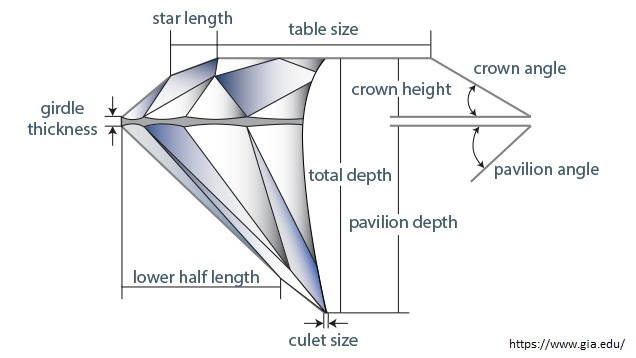 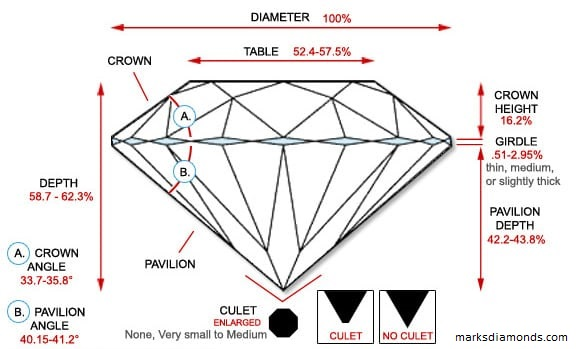


In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

### Load the data

In [2]:
df = pd.read_csv('../input/diamonds/diamonds.csv', index_col=[0])

### Data exploration (EDA)

In [3]:
df.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
df.tail(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
53921,0.70,Very Good,E,VS2,62.4,60.0,2755,5.57,5.61,3.49
53922,0.70,Very Good,E,VS2,62.8,60.0,2755,5.59,5.65,3.53
53923,0.70,Very Good,D,VS1,63.1,59.0,2755,5.67,5.58,3.55
53924,0.73,Ideal,I,VS2,61.3,56.0,2756,5.80,5.84,3.57
53925,0.73,Ideal,I,VS2,61.6,55.0,2756,5.82,5.84,3.59
53926,0.79,Ideal,I,SI1,61.6,56.0,2756,5.95,5.97,3.67
53927,0.71,Ideal,E,SI1,61.9,56.0,2756,5.71,5.73,3.54
53928,0.79,Good,F,SI1,58.1,59.0,2756,6.06,6.13,3.54
53929,0.79,Premium,E,SI2,61.4,58.0,2756,6.03,5.96,3.68
53930,0.71,Ideal,G,VS1,61.4,56.0,2756,5.76,5.73,3.53


In [5]:
# Let's get some basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


### The key thing to get from here is that:
* We have 10 column from which 7 of them are numerical and 3 of them are object types, so we will have to change categorical variables into numbers
* We have no null values (but that doesn't mean all of them are with correct input)

In [6]:
# Just to make sure let's check null values
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
# Let's see some descriptive statistics
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
# Everything looks normal besides that there are 0 values for dimensions (x, y, z). We have to take a closer look at that.
# First let's see how many are there:
df.loc[(df.x==0) | (df.y==0) | (df.z==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [9]:
# There is not so many of them so for now we can remove those examples
cond = df[(df["x"]==0) | (df["y"]==0) | (df["z"]==0)].index
df.drop(cond, inplace=True)

In [10]:
# Let's make sure everything went well:
df.loc[(df.x==0) | (df.y==0) | (df.z==0)], df.shape

(Empty DataFrame
 Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
 Index: [],
 (53920, 10))

### As we can see there are 53920 instead of 53940 examples so everything is ok.

### Filling and turning categorical variables into numbers

In [11]:
# Check for columns which aren't numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

cut
color
clarity


In [12]:
# Turning categorical variables into numbers
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes+1

pd.Categorical(df["cut"]).codes, pd.Categorical(df["color"]).codes, pd.Categorical(df["clarity"]).codes,  

(array([2, 3, 1, ..., 4, 3, 2], dtype=int8),
 array([1, 1, 1, ..., 0, 4, 0], dtype=int8),
 array([3, 2, 4, ..., 2, 3, 3], dtype=int8))

In [13]:
# Now all of the features are presented as numbers
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,3,2,4,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,6,6,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,7,4,63.3,58.0,335,4.34,4.35,2.75


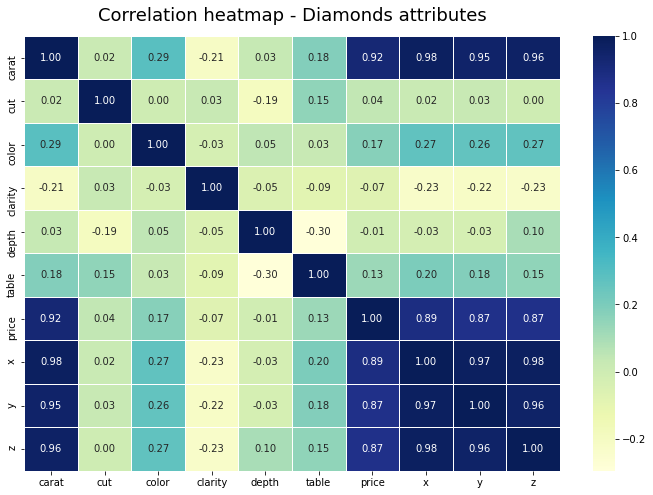

In [14]:
# Now let's see how the diamonds attributes corelates with each other
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Correlation heatmap - Diamonds attributes', fontdict={'fontsize':18}, pad=15)
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

#### As we can see on the correlation matrix there is a strong positive correlation between price and weight (carat) and price and size (x, y, z) of a diamond. The other attributes don't have strong positive or negative correlation. On other features we should focus when comparing diamonds with similar size and weight.

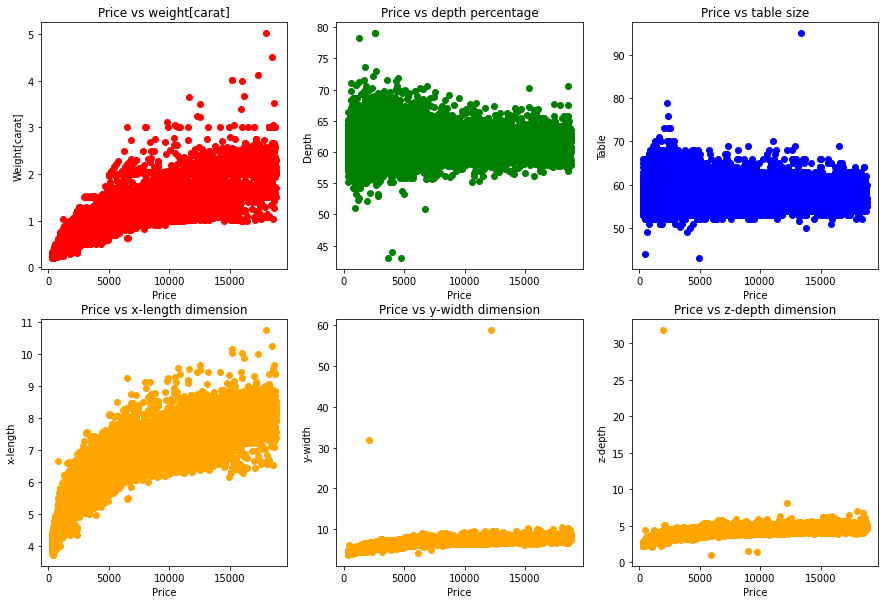

In [15]:
# Let's plot numerical variables
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2,
                                                       ncols=3,
                                                       figsize=(15,10))
# Price vs weight plot
scatter = ax0.scatter(x=df["price"],
                      y=df["carat"],
                      color="red")
ax0.set(title="Price vs weight[carat]",
        xlabel="Price",
        ylabel="Weight[carat]")

# Price vs depth plot
scatter = ax1.scatter(x=df["price"],
                      y=df["depth"],
                      color="green")
ax1.set(title="Price vs depth percentage",
        xlabel="Price",
        ylabel="Depth")

# Price vs table plot
scatter = ax2.scatter(x=df["price"],
                      y=df["table"],
                      color="blue")
ax2.set(title="Price vs table size",
        xlabel="Price",
        ylabel="Table")

# Price vs x-dimension plot
scatter = ax3.scatter(x=df["price"],
                      y=df["x"],
                      color="orange")
ax3.set(title="Price vs x-length dimension",
        xlabel="Price",
        ylabel="x-length")

# Price vs y-dimension plot
scatter = ax4.scatter(x=df["price"],
                      y=df["y"],
                      color="orange")
ax4.set(title="Price vs y-width dimension",
        xlabel="Price",
        ylabel="y-width")

# Price vs z-dimension plot
scatter = ax5.scatter(x=df["price"],
                      y=df["z"],
                      color="orange")
ax5.set(title="Price vs z-depth dimension",
        xlabel="Price",
        ylabel="z-depth");

#### We have to take a closer look at outliers. In the case of dimensions (x, y, z) together with table size, there are probably wrong inputs. With the weight and depth there are only a few outliers so we can assume that those are very rare cases so we can skip them.


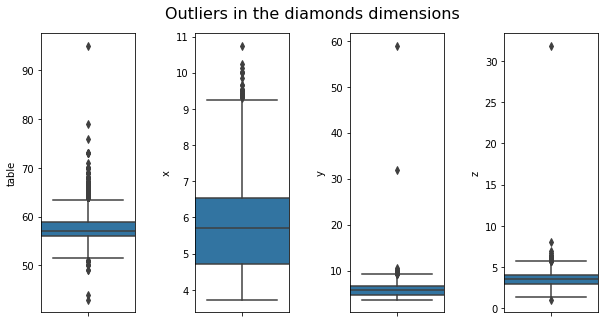

In [16]:
names=['table', 'x', 'y', 'z']
ncols=len(names)
fig, ax = plt.subplots(1, ncols, figsize=(9,5))
fig.tight_layout(pad=3.0)
fig.suptitle('Outliers in the diamonds dimensions', fontsize=16)

for name, ax in zip(names, ax):
    sns.boxplot(y=name, data=df, ax=ax, width=1.5)
    

In [28]:
sorted(df)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
# Q1 = np.percentile(df['table'], 25, interpolation = 'midpoint')
# Q3 = np.percentile(df['table'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

df_clear = df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]
df_clear

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,3,2,4,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31
4,0.29,4,6,6,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,7,4,63.3,58.0,335,4.34,4.35,2.75
6,0.24,5,7,8,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,3,1,3,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,2,1,3,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,5,1,3,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,4,5,4,61.0,58.0,2757,6.15,6.12,3.74


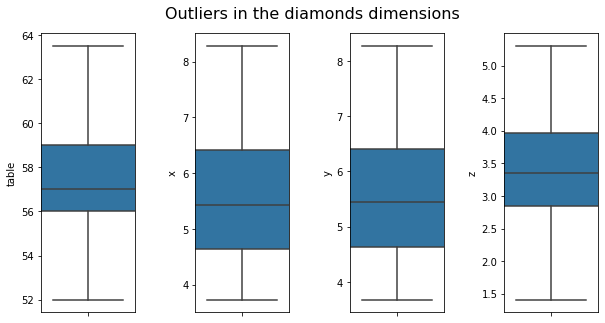

In [29]:
# Now we can check hte otliers on a box plots.

names=['table', 'x', 'y', 'z']
ncols=len(names)
fig, ax = plt.subplots(1, ncols, figsize=(9,5))
fig.tight_layout(pad=3.0)
fig.suptitle('Outliers in the diamonds dimensions', fontsize=16)

for name, ax in zip(names, ax):
    sns.boxplot(y=name, data=df_clear, ax=ax, width=1.5)

#### As we can see the otliers have been removed so we can move on to modeling our data.

### Modeling

In [31]:
X = df_clear.drop("price", axis=1)
y = df_clear["price"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37755, 9), (9439, 9), (37755,), (9439,))

### We're going to try different machine learning models:
1. Linear Regression
2. Lasso
3. ElasticNet

In [34]:
model = {"Linear Regression": LinearRegression(),
         "Lasso": Lasso(),
         "ElasticNet": ElasticNet(),
         "RandomForestRegressor": RandomForestRegressor()}

def fit_and_evaluate(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates machine learning models.
    models: a dictionary with machine learning models to be used
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # Make an empty dictionary to keep model scores
    model_scores = {}
    # Looping through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [35]:
model_scores = fit_and_evaluate(models = model,
                                X_train = X_train,
                                X_test = X_test,
                                y_train = y_train,
                                y_test = y_test)
model_scores

{'Linear Regression': 0.8913363526017811,
 'Lasso': 0.8909373825558177,
 'ElasticNet': 0.812485022703713,
 'RandomForestRegressor': 0.9823251329352697}